In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataframe=pd.read_csv('Zomato data .csv')
print(dataframe)
print("***HEAD****")
print(dataframe.head())

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [14]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


****RATINGS OF RESTAURANT****


Text(0.5, 0, 'TYPE OF RESTAURANT')

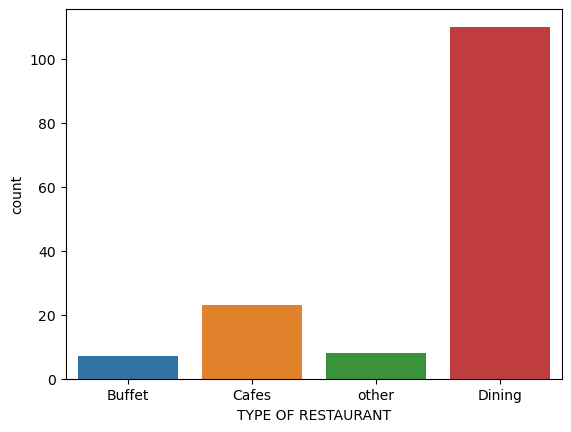

In [17]:
print("****RATINGS OF RESTAURANT****")
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("TYPE OF RESTAURANT")

Text(0, 0.5, 'VOTES')

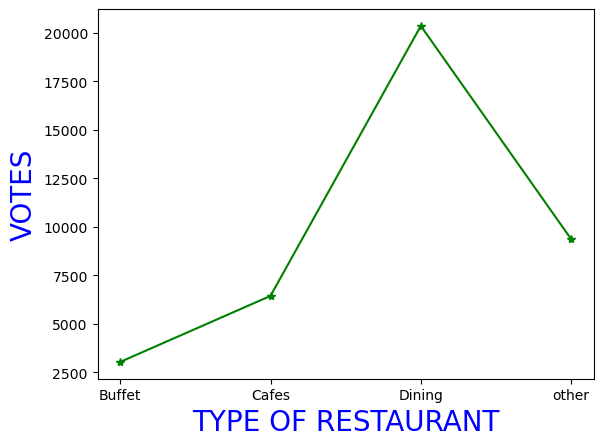

In [18]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="green",marker="*")
plt.xlabel("TYPE OF RESTAURANT", c="BLUE", size=20)
plt.ylabel("VOTES", c="blue", size=20)

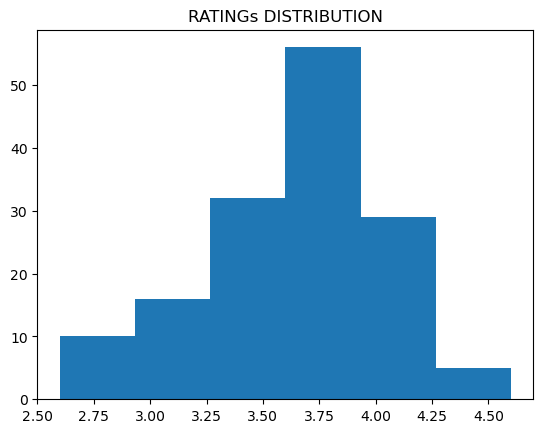

In [19]:
plt.hist(dataframe['rate'], bins=6)
plt.title("RATINGs DISTRIBUTION")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

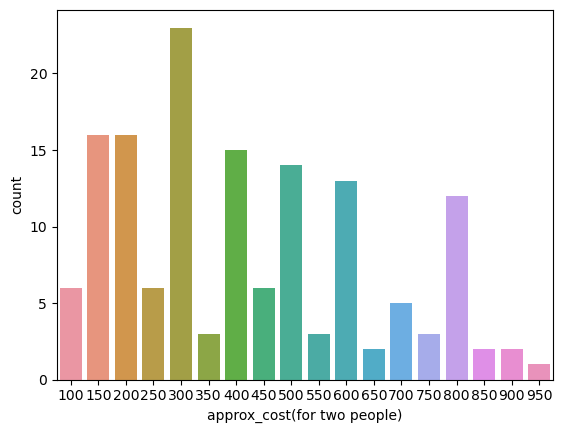

In [22]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

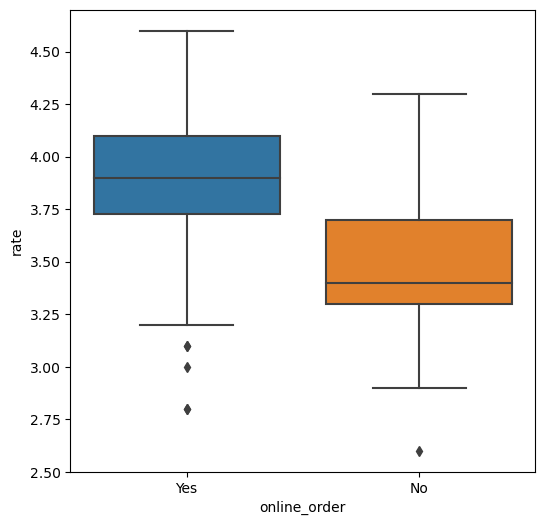

In [24]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',data=dataframe)

C:\Users\HP ELITEBOOK 230G5\AppData\Local\Temp\ipykernel_10832\2116833899.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order')


Text(50.722222222222214, 0.5, 'listed_in(type)')

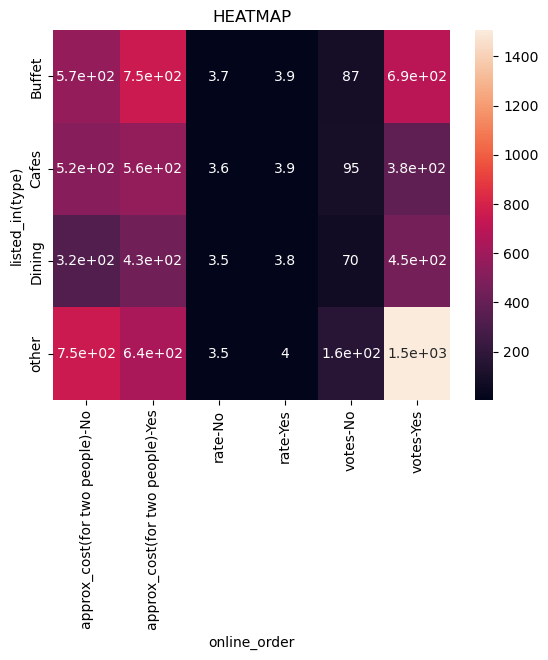

In [26]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order')
sns.heatmap(pivot_table, annot=True)
plt.title('HEATMAP')
plt.xlabel("online_order")
plt.ylabel("listed_in(type)")